# 1. Funciones de Activación

La Función de Activación de un nodo define la salida (output) de un nodo dada una entrada (input) o un conjunto de entradas.
En las redes neuronales la función de activación es usualmente una abstracción representando una tasa de potencial de activación gatillándose en la celda. En su forma simplificada, esta función es binaria, esto es generalemnte en un rango determinado como (0,1) o (-1,1).

In [15]:
#Dependecias
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

Creando unos datos para trabajar:

In [13]:
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(200, 1)
x = Variable(x)
x_np = x.data.numpy()   # numpy array para graficar

- Funciones de activacion mas populares:

In [14]:
y_relu = F.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

# y_softmax = F.softmax(x)
# softmax es un tipo especial de funcion de activación la cual trata de probabilidades y hará la suma como 1

C:\Users\smart\Anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


### Graficando las funciones de activación 

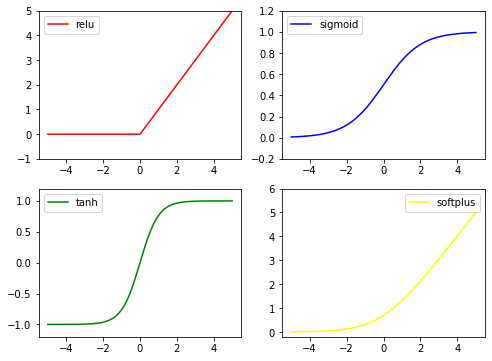

In [17]:
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='blue', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='green', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='yellow', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()


La **función ReLU** transforma los valores introducidos anulando los valores negativos y dejando los positivos tal y como entran.

La **función sigmoide** transforma los valores introducidos a una escala (0,1), donde los valores altos tienen de manera asintótica a 1 y los valores muy bajos tienden de manera asintótica a 0.

La **función tangente (tanh)** hiperbólica transforma los valores introducidos a una escala (-1,1), donde los valores altos tienen de manera asintótica a 1 y los valores muy bajos tienden de manera asintótica a -1.

La **función softplus** es una aproximación suave de la función ReLU y puede ser usada para restringir la salida de una neurona para que siempre sea positiva.

Como mencionamos anteriormente La **función Softmax** transforma las salidas a una representación en forma de probabilidades, de tal manera que el sumatorio de todas las probabilidades de las salidas de 1



# 2. Modelos de Regresión lineal

El modelo del Perceptron multicapa (redes neuronales multicapa) es equivalente a un **modelo de regresión lineal** debido a la similitud de la variable de salida (variable respuesta Y) que se relaciona aplicando la función de activación (función identidad) sobre una combinación lineal de pesos (coeficientes) con las variables de entrada (variables predictoras).

Otra de las razones a la hora del uso de las redes neuronales aplicadas en modelos de regresion es que no necesitan el cumplimiento de supuestos teóricos como en los modelos estadísticos clásicos.

Creando datos para trabajar:

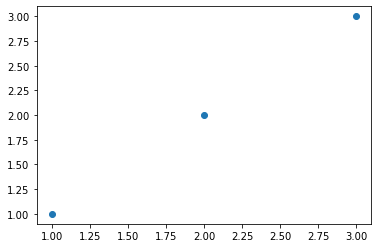

In [18]:
x_train = torch.Tensor([[1],[2],[3]])
y_train = torch.Tensor([[1],[2],[3]])

x, y = Variable(x_train), Variable(y_train)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

##### Modelo Naive

- definiendo el modelo:

In [19]:
x, y

(tensor([[1.],
         [2.],
         [3.]]),
 tensor([[1.],
         [2.],
         [3.]]))

In [20]:
W = Variable(torch.rand(1,1))
W

tensor([[0.2083]])

In [21]:
x.mm(W)

tensor([[0.2083],
        [0.4167],
        [0.6250]])

- definir una funciòn de costo:

In [22]:
cost_func = nn.MSELoss()

cost_func

MSELoss()

**MSELoss** crea un criterio que mide el error cuadrático medio (norma L2 cuadrada) entre cada elemento en la entrada xx y el objetivo yy.

- **Entrenando el modelo de regresion**:


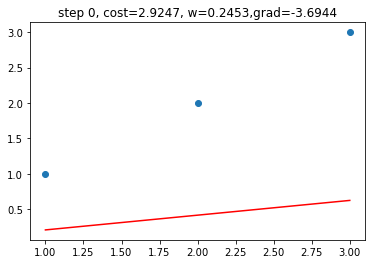

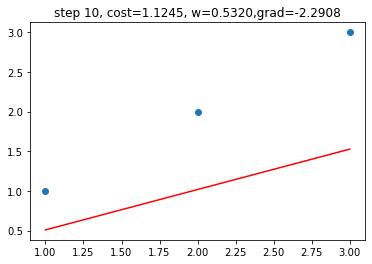

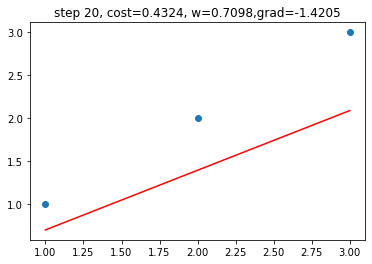

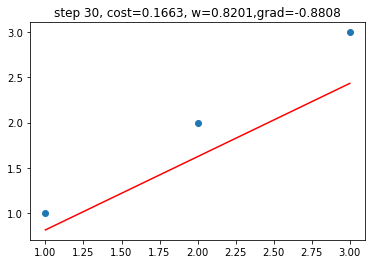

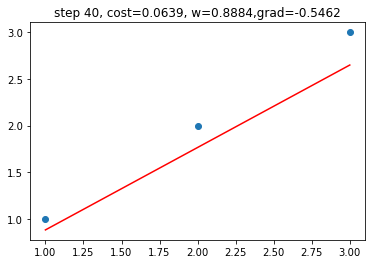

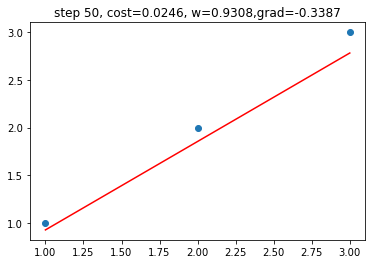

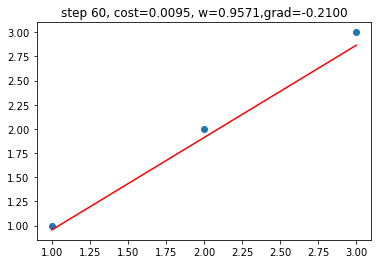

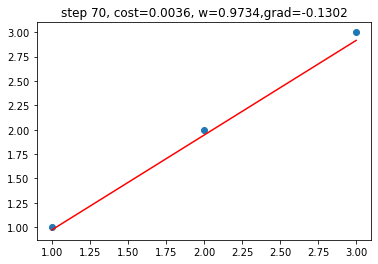

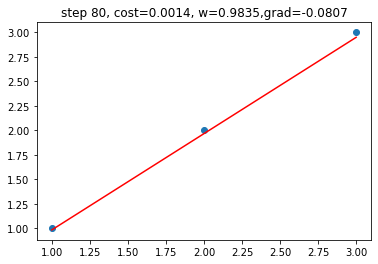

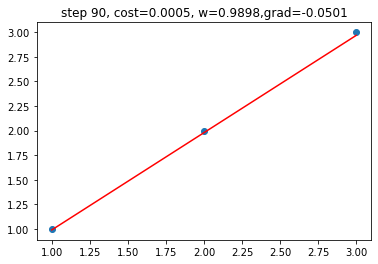

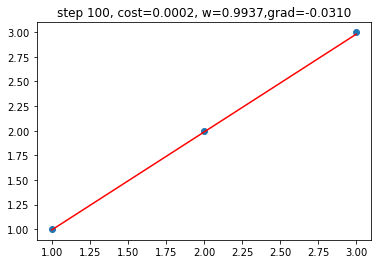

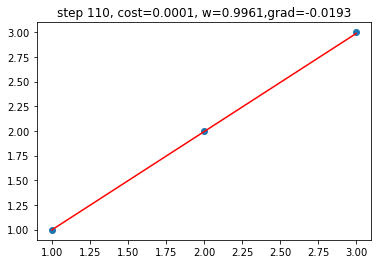

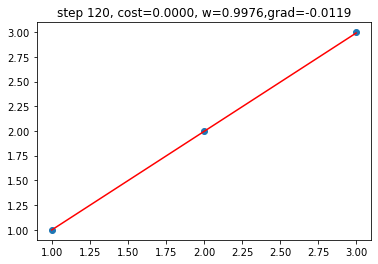

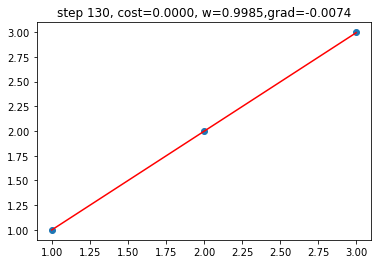

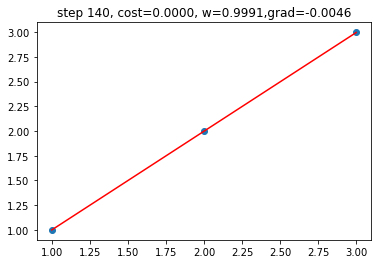

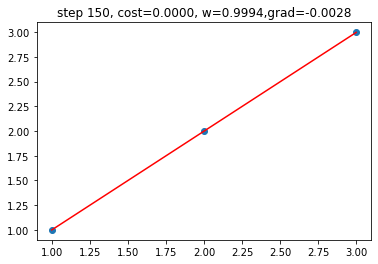

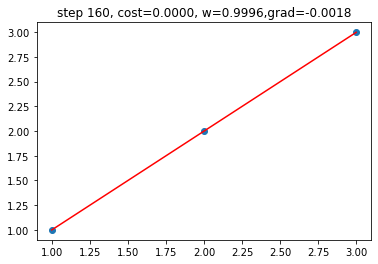

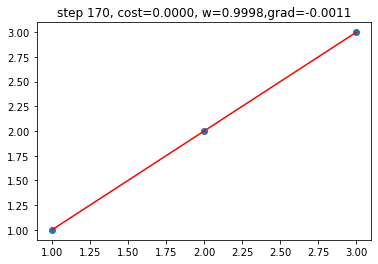

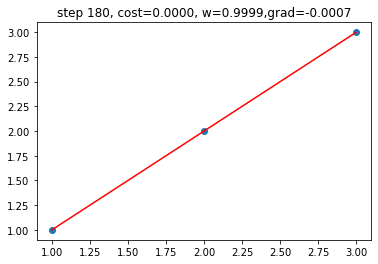

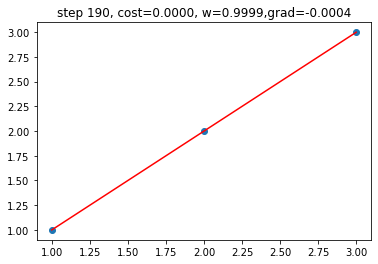

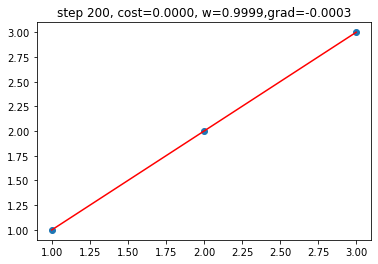

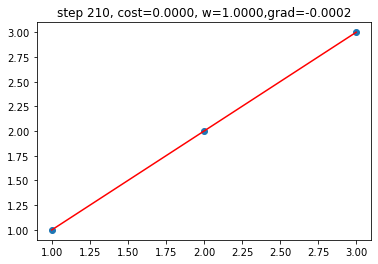

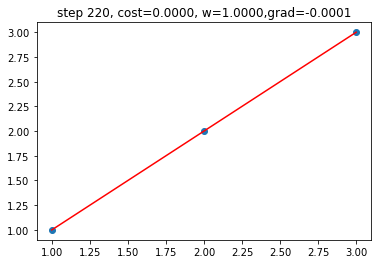

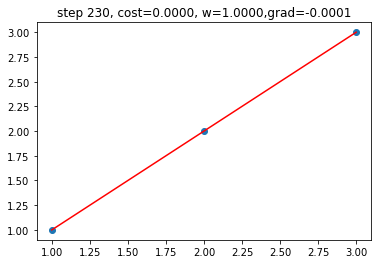

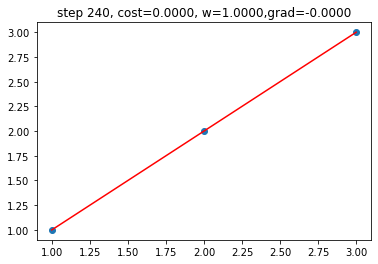

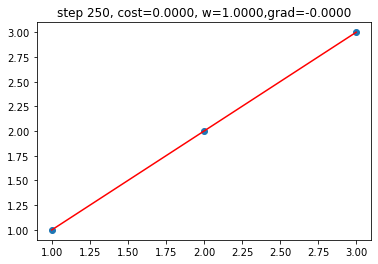

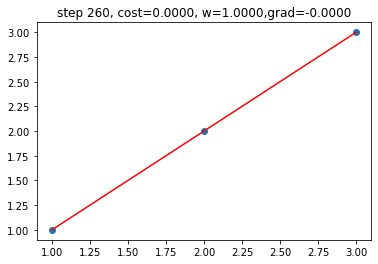

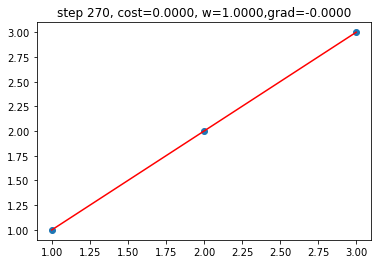

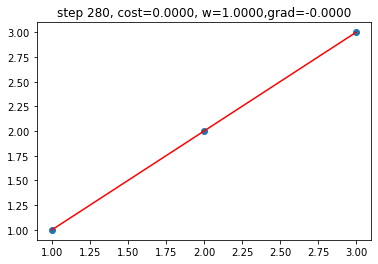

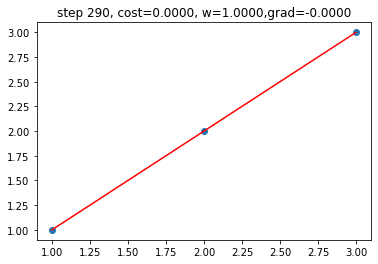

In [23]:
plt.ion()

lr = 0.01

for step in range(300):
    prediction = x.mm(W)
    cost = cost_func(prediction, y)
    gradient = (prediction-y).view(-1).dot(x.view(-1)) / len(x)
    W -= lr * gradient
    
    if step % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-')
        plt.title('step %d, cost=%.4f, w=%.4f,grad=%.4f' %  (step,cost.data, W.data[0], gradient.data))
        plt.show()
    
#     if step %10 == 0:
#         print(step, "going cost")
#         print(cost)
#         print((prediction-y).view(-1))
#         print((x.view(-1)))
#         print(gradient)
#         print(W)
plt.ioff()

In [24]:
x_test = Variable(torch.Tensor([[5]]))
y_test = x_test.mm(W)
y_test

tensor([[5.0000]])

### Ahora con el módulo nn de PyTorch:

DEFINIR EL MODELO LINEAL

In [25]:
model  = nn.Linear(1, 1, bias=True)

print(model)

model.weight, model.bias

Linear(in_features=1, out_features=1, bias=True)


(Parameter containing:
 tensor([[0.8831]], requires_grad=True),
 Parameter containing:
 tensor([-0.6089], requires_grad=True))

In [26]:
cost_func = nn.MSELoss()

In [27]:
for i in model.parameters():
    print(i)

Parameter containing:
tensor([[0.8831]], requires_grad=True)
Parameter containing:
tensor([-0.6089], requires_grad=True)


In [28]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

**Entrenando con el modulo nn**

In [29]:
model(x)

tensor([[0.2741],
        [1.1572],
        [2.0402]], grad_fn=<AddmmBackward>)

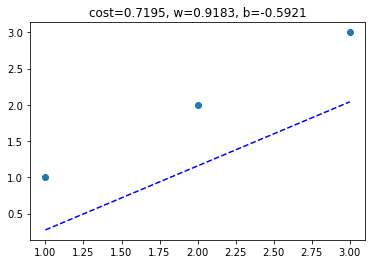

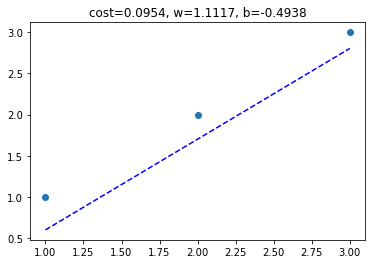

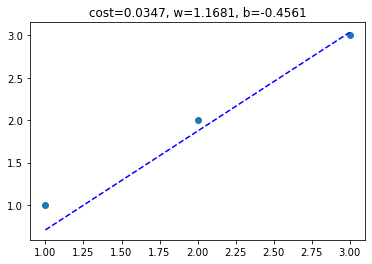

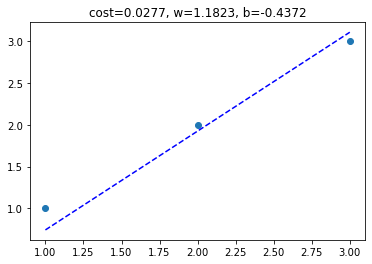

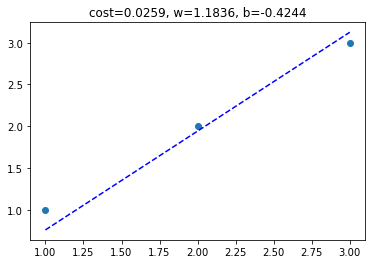

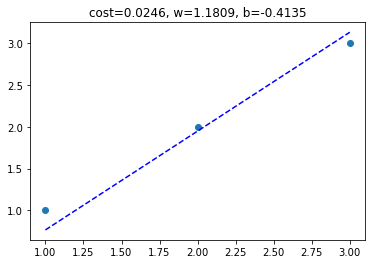

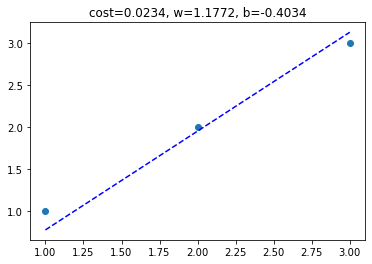

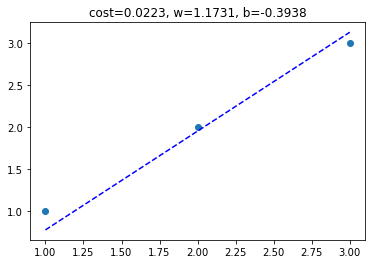

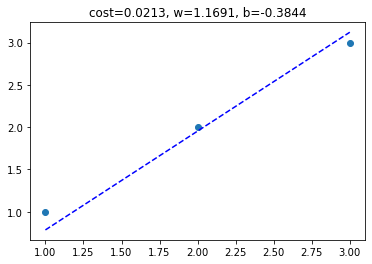

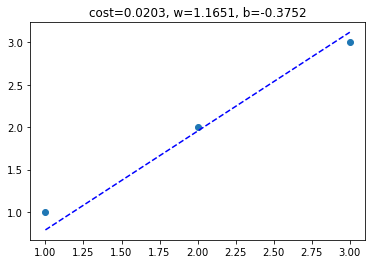

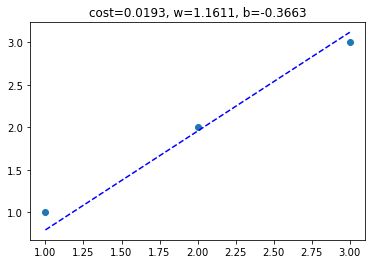

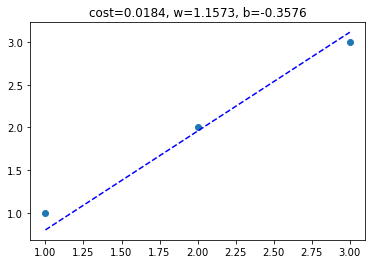

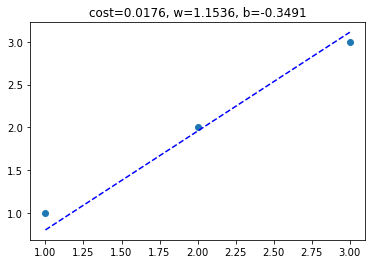

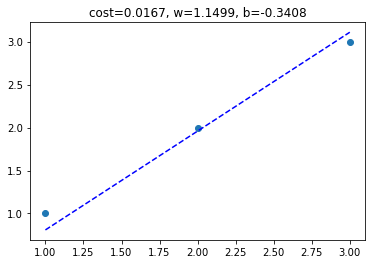

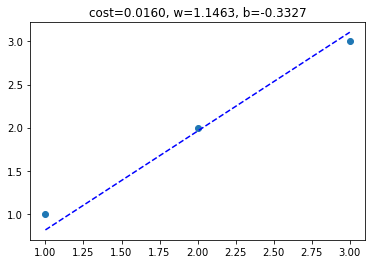

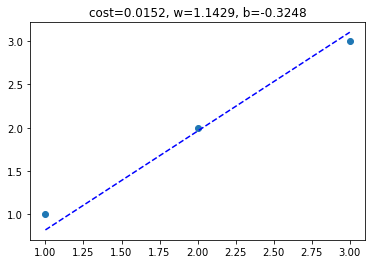

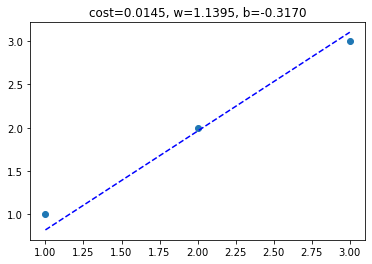

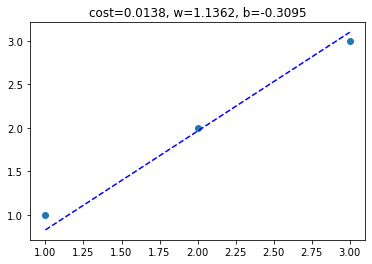

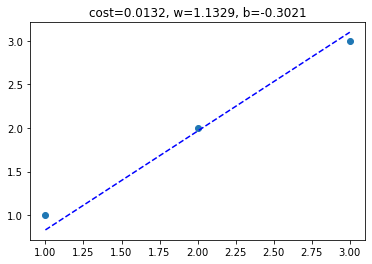

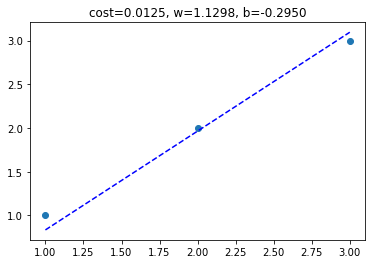

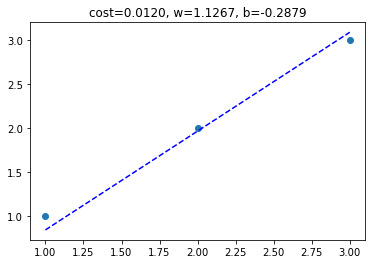

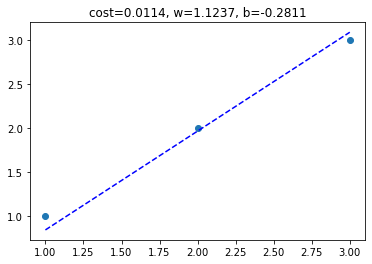

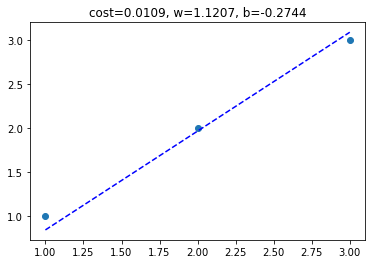

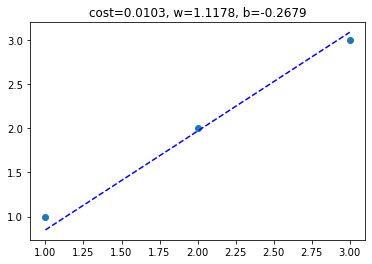

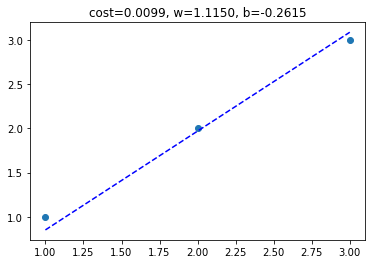

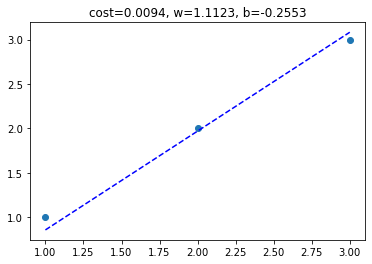

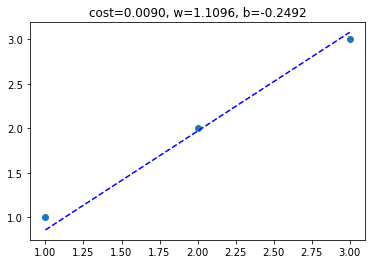

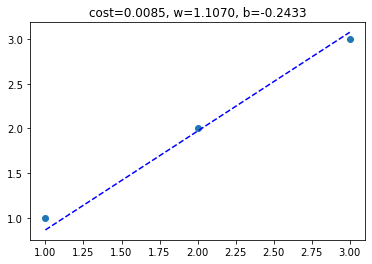

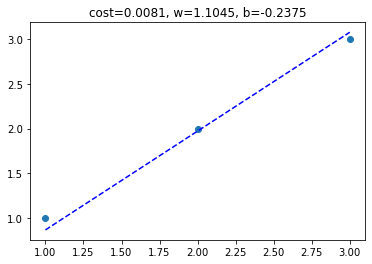

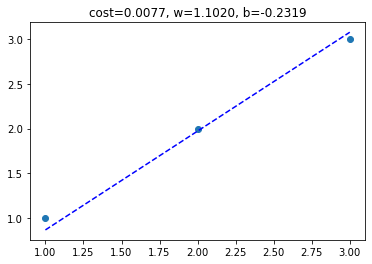

In [30]:
plt.ion()

for step in range(300):
    prediction = model(x)
    cost = cost_func(prediction, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'b--')
        plt.title('cost=%.4f, w=%.4f, b=%.4f' % (cost.data,model.weight.data[0][0],model.bias.data))
        plt.show()

plt.ioff()

In [31]:
x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input : %.4f, output:%.4f' % (x_test.data[0][0], y_test.data[0][0]))


input : 7.0000, output:7.4718


In [32]:
for step in range(300):
    prediction = model(x)
    cost = cost_func(prediction, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input : %.4f, output:%.4f' % (x_test.data[0][0], y_test.data[0][0]))

input : 7.0000, output:7.2292


In [33]:
model.weight, model.bias

(Parameter containing:
 tensor([[1.0485]], requires_grad=True),
 Parameter containing:
 tensor([-0.1102], requires_grad=True))

## 3. Modelos no Lineales

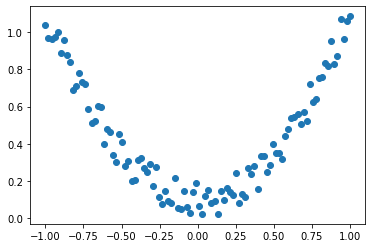

In [36]:
# Haciendo los datos:

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()


Definiendo el modelo No Lineal:

In [37]:
hidden = nn.Linear(1, 20, bias=True)
activation = nn.ReLU()
#activation = nn.Sigmoid()
optput = nn.Linear(20, 1, bias=True)

nn.LinearParameters: nn.Linear(in_features, out_features, bias)

- in_features: tamaño de cada muestra de entrada
- out_features: tamaño de cada muestra de salida
- sesgo: si se establece en Falso, la capa no aprenderá un sesgo aditivo. Valor predeterminado: verdadero

In [38]:
net = nn.Sequential(hidden, activation, optput)
# Combinar modulos

##### Definir optimizador y Loss Function

In [39]:
#optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()

##### Entrenamiento

In [40]:
x.size()

torch.Size([100, 1])

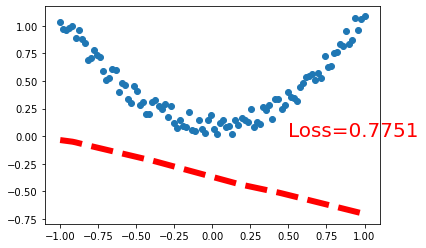

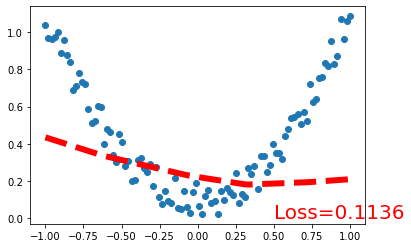

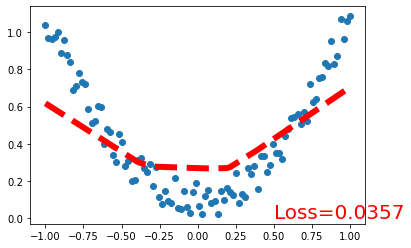

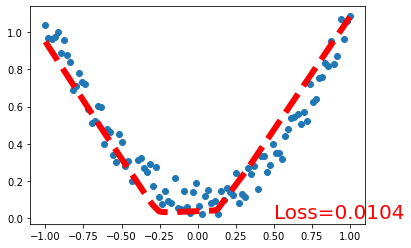

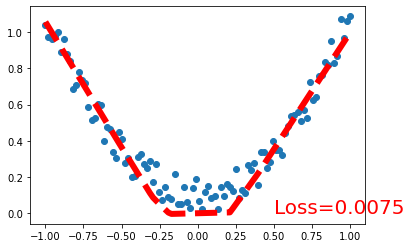

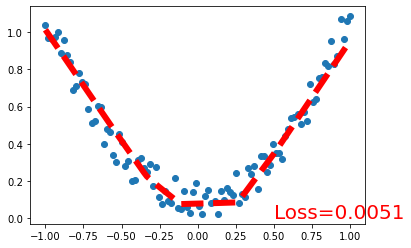

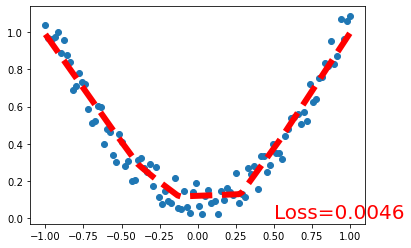

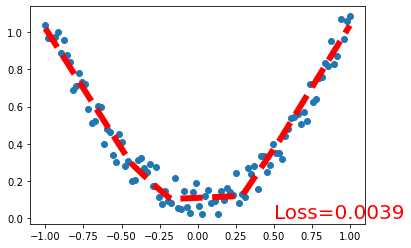

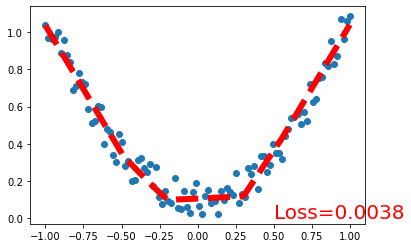

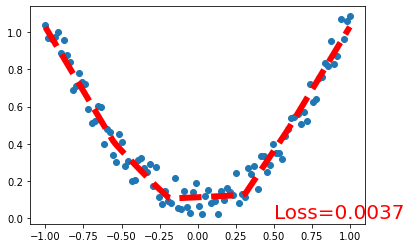

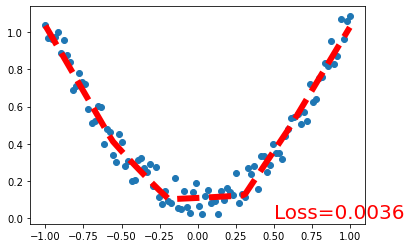

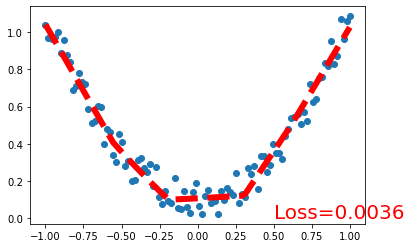

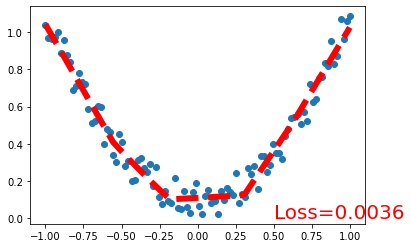

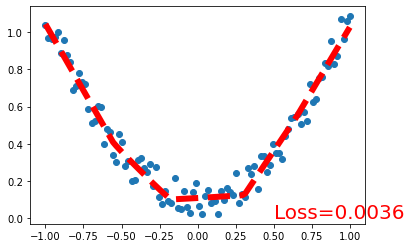

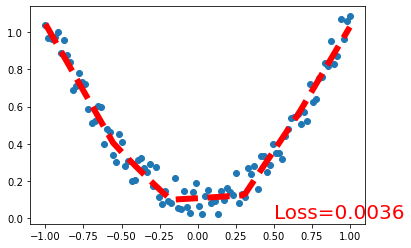

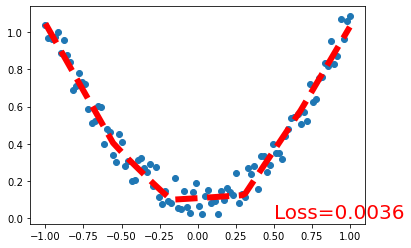

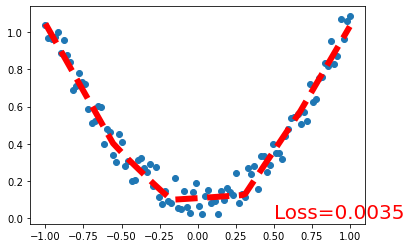

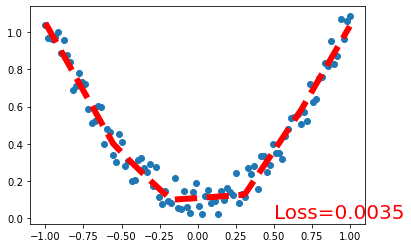

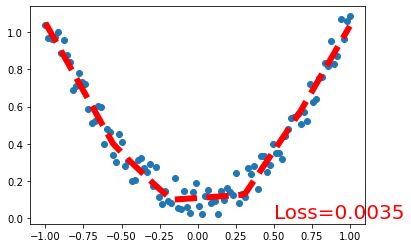

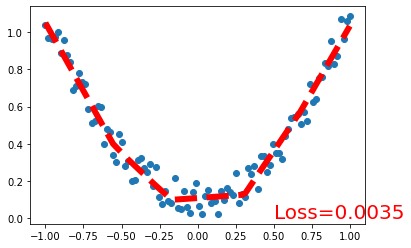

In [41]:
for t in range(200):
    prediction = net(x)
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 10  == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r--', lw=6)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data, fontdict={'size':20, 'color':'red'})
        plt.show()
        plt.pause(0.2)
        
plt.ioff()